##### Pacotes numpy e pandas
##### Pacote "os" para explorar diretórios e arquivos

##### **Numpy**

In [26]:
# importação do pacote numpy
import numpy as np

# ======= Geração de números aleatórios ==========

# Valores máximos e mínimos
val_max, val_min = 10, 0.5
# Números de valores aleatórios
n = 1000

# Utilizando pacote numpy e função uniform que está dentro do subpacote random
arr_aleatorio_real = np.random.uniform(val_min, val_max, n) #random.uniform(low, high, size)
#print(arr_aleatorio_real)

arr_aleatorio_inteiro = np.random.randint(val_min, val_max, n)
#print(arr_aleatorio_inteiro)

In [27]:
# Verificando o tamanho da matriz arr_aleatorio_real
#shape - para determinar o tamanho da matriz
print(arr_aleatorio_real.shape)
print(np.shape(arr_aleatorio_real))

#size
print(arr_aleatorio_real.size)

# utilizando o reshape para formatar um vetor em uma matriz com 2 linhas e n colunas

mat = arr_aleatorio_real.reshape(2,-1)
print(np.shape(mat))
print(mat.size)
#print(mat)

(1000,)
(1000,)
1000
(2, 500)
1000


In [46]:
# multiplicação de matrizes

# multiplicação com arrays do mesmo tamanho
arr_resultado = arr_aleatorio_inteiro * arr_aleatorio_real

# multiplicação com arrays de diferentes dimensões - ERRADO
multiplicador = np.random.randint(1, 10, 2)

arr_resultado2 =[]
for multi in multiplicador:
    print(multi)
    arr_resultado2.append(arr_aleatorio_inteiro*multi)
#    print(arr_resultado2)

arr_resultado3 = np.concatenate(arr_resultado2)
print(arr_resultado3.shape)

arr_resultado4 = np.vstack(arr_resultado2)
print(arr_resultado4.shape)

arr_resultado5 = np.hstack(arr_resultado2)
print(arr_resultado5.shape)

arr_resultado6 = arr_resultado4.transpose()
print(arr_resultado6.shape)

arr_resultado7 = np.random.rand(10, 10, 10) #matriz com 3 dimensões
print(arr_resultado7.shape)

5
6
(2000,)
(2, 1000)
(2000,)
(1000, 2)
(10, 10, 10)


In [58]:
# acessando valores da matriz
# considerando que arr_resultado7 é uma matriz de temperatura com as dimensões [lat, lon, tempo], determine a temperatura para o 
# tempo igual a 1 em todas as latitudes e longitudes

arr_resultado7[:,:,0] #primeiro tempo é 0

# para todas as longitudes e primeira lat e primeiro tempo
arr_resultado7[0, :, 0]

# todas as lat, 1ª long e último tempo
arr_resultado7[:, 0, -1] # -1 retorna o último (de trás para frente)
np.shape(arr_resultado7)[2]
arr_resultado7[:, 0, np.shape(arr_resultado7)[2]-1]

# Para um ponto lat lon no espaço e todo tempo
arr_resultado7[2, 2, :]

# uma região no espaço
arr_resultado7[2:4, 4:6, 1]

array([[0.82988047, 0.45701137],
       [0.24880557, 0.85120676]])

In [72]:
# Estatísticas com numpy

# mínimo considerando todas as dimensões
min_absoluto = arr_resultado7.min()
print(min_absoluto)

# mínimo para cada ponto (lat lon) considerando todos os tempos
min_latlon = arr_resultado7.min(axis=2)
min_latlon = np.min(arr_resultado7, axis=2)
#print(min_latlon)

# atribuindo um valor NaN dentro da matriz em algum lugar
# NaN - not a number - tipo uma célula vazia
arr_resultado7[2, 3, 1] = np.nan
#print(arr_resultado7)

# mínimo com nan
print(np.nanmin(arr_resultado7))


nan
0.0001433857000896488


In [ ]:
# atribuindo um valor NaN dentro da matriz em algum lugar
arr_resultado7[:, :, 1] = np.nan
print(arr_resultado7)

##### **Pandas**

https://hoinaski.prof.ufsc.br/files/
RQAr_2025 > MQAr > MP25 > arquivo de escolha

In [77]:
# importando o pandas
import pandas as pd

# utilizando o pandas para abrir um arquivo
df = pd.read_csv(r"C:\Users\leti_\Downloads\SP0063RA002.csv") #df = data frame #usar o r na frente do caminho para inverter as barras

# pré-visualização
df.head()

,DATETIME,ANO,MES,DIA,HORA,VALOR,VALOR_ORIGINAL,UNIDADE,QAQC_INTERNO,QAQC_MMA
0,2017-05-29 01:00:00,2017,5,29,1,42.0,42.0,µg/m3,True,True
1,2017-05-29 02:00:00,2017,5,29,2,49.0,49.0,µg/m3,True,True
2,2017-05-29 03:00:00,2017,5,29,3,42.0,42.0,µg/m3,True,True
3,2017-05-29 04:00:00,2017,5,29,4,34.0,34.0,µg/m3,True,True
4,2017-05-29 05:00:00,2017,5,29,5,26.0,26.0,µg/m3,True,True


In [84]:
# indexação com pandas

# todas as linhas e segunda coluna
df.iloc[:,1]

# todas as colunas e primeira linha
df.iloc[0, :]

# usando loc
df.loc[:, 'ANO']

# usando apenas o colchete
df['ANO']

# extrair nome das colunas
df.columns

#acessando o valor da terceira coluna
df.loc[:, df.columns[2]]

0        5
1        5
2        5
3        5
4        5
        ..
72523    9
72524    9
72525    9
72526    9
72527    9
Name: MES, Length: 72528, dtype: int64

In [101]:
# Inserindo um valor *********************************************
df.loc[1, 'VALOR'] = -1
print(df['VALOR'])

0        42.0
1        -1.0
2        42.0
3        34.0
4        26.0
         ... 
72523    18.0
72524     1.0
72525     6.0
72526     4.0
72527    11.0
Name: VALOR, Length: 72528, dtype: float64


In [102]:
# substituindo valores ruins
df.loc[df['VALOR']<0,'VALOR'] = np.nan

df['VALOR']

0        42.0
1         NaN
2        42.0
3        34.0
4        26.0
         ... 
72523    18.0
72524     1.0
72525     6.0
72526     4.0
72527    11.0
Name: VALOR, Length: 72528, dtype: float64

In [91]:
# Estatística com pandas
df.describe()

,ANO,MES,DIA,HORA,VALOR,VALOR_ORIGINAL,Valor
count,72528.000000,72528.000000,72528.000000,72528.000000,65962.000000,66721.000000,1.0
mean,2021.041805,6.540426,15.725692,11.500000,16.367181,16.180992,-1.0
std,2.417737,3.397025,8.817042,6.922234,13.166456,13.205918,NaN
min,2017.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-1.0
25%,2019.000000,4.000000,8.000000,5.750000,7.000000,7.000000,-1.0
50%,2021.000000,7.000000,16.000000,11.500000,13.000000,13.000000,-1.0
75%,2023.000000,9.000000,23.000000,17.250000,22.000000,21.000000,-1.0
max,2025.000000,12.000000,31.000000,23.000000,234.000000,234.000000,-1.0


In [103]:
print(df['VALOR'].mean())

16.366686375282363


In [107]:
df.loc[df['VALOR']>np.nanpercentile(df['VALOR'], 99),'VALOR'] = np.nan
df.describe()

,ANO,MES,DIA,HORA,VALOR,VALOR_ORIGINAL,Valor
count,72528.000000,72528.000000,72528.000000,72528.000000,64762.000000,66721.000000,1.0
mean,2021.041805,6.540426,15.725692,11.500000,15.413190,16.180992,-1.0
std,2.417737,3.397025,8.817042,6.922234,11.113534,13.205918,NaN
min,2017.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-1.0
25%,2019.000000,4.000000,8.000000,5.750000,7.000000,7.000000,-1.0
50%,2021.000000,7.000000,16.000000,11.500000,13.000000,13.000000,-1.0
75%,2023.000000,9.000000,23.000000,17.250000,21.000000,21.000000,-1.0
max,2025.000000,12.000000,31.000000,23.000000,55.000000,234.000000,-1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1f16630a0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f16630a350>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f166309f90>],
 'medians': [<matplotlib.lines.Line2D at 0x1f16630a5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f16630a710>],
 'means': []}

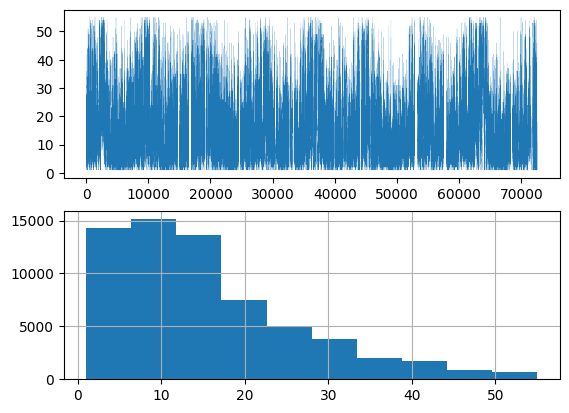

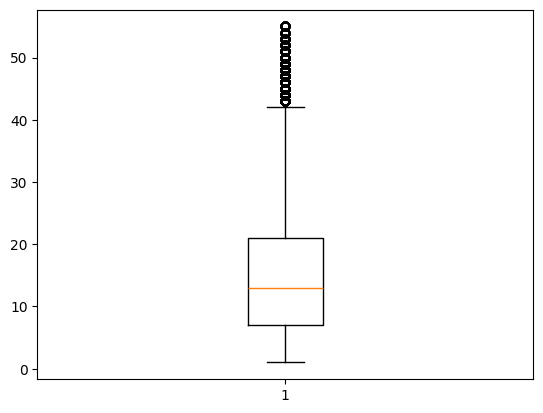

In [115]:
#plotagem
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)
df['VALOR'].plot(ax=ax[0],linewidth=0.1)
df['VALOR'].hist(ax=ax[1])

fig, ax = plt.subplots()
ax.boxplot(df.loc[~np.isnan(df['VALOR']),'VALOR'])

In [117]:
# operações com datetime

df['DATETIME'] = pd.to_datetime(df['DATETIME'])
df['DATETIME']

0       2017-05-29 01:00:00
1       2017-05-29 02:00:00
2       2017-05-29 03:00:00
3       2017-05-29 04:00:00
4       2017-05-29 05:00:00
                ...        
72523   2025-09-05 20:00:00
72524   2025-09-05 21:00:00
72525   2025-09-05 22:00:00
72526   2025-09-05 23:00:00
72527   2025-09-06 00:00:00
Name: DATETIME, Length: 72528, dtype: datetime64[ns]

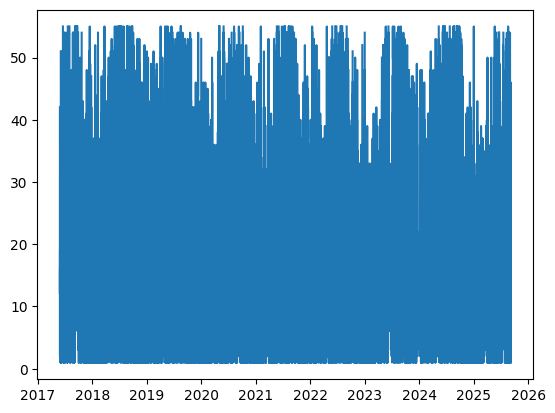

In [118]:
fig, ax = plt.subplots()
ax.plot(df.DATETIME, df.VALOR)

In [124]:
# Criando um vetor datetime a partir de colunas ano, mês, dia, hora
data = {'year': df.ANO,
        'month': df.MES,
        'day': df.DIA,
        'hour': df.HORA}
df_datetime = pd.DataFrame(data)
    
df['datetime_column'] = pd.to_datetime(df_datetime[['year', 'month', 'day', 'hour']])

<Axes: xlabel='ANO,MES'>

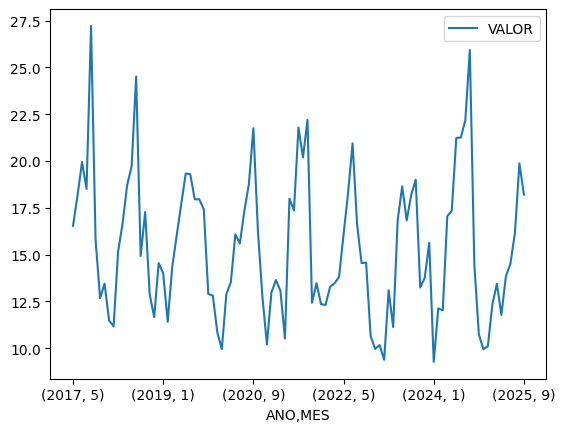

In [130]:
df[['ANO', 'MES', 'VALOR']].groupby(['ANO', 'MES']).mean().plot()

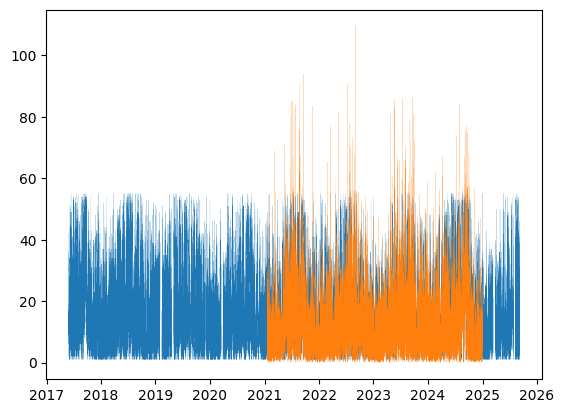

In [138]:
# Lendo outro arquivo
df2 = pd.read_csv(r"C:\Users\leti_\Downloads\RJ0069RA002.csv")
df2['DATETIME'] = pd.to_datetime(df2['DATETIME'])

fig, ax = plt.subplots()

ax.plot(df.DATETIME, df.VALOR, linewidth = 0.1)
ax.plot(df2.DATETIME, df2.VALOR, linewidth = 0.1)

In [143]:
# Automatizando com o pacote os

import os
files = os.listdir(r"C:\Users\leti_\OneDrive\Documentos\python_env_app")
files = [ fname for fname in files if fname.endswith('.csv')]
files

['RJ0069RA002.csv', 'SP0063RA002.csv']

In [3]:
for file in files:
    print(file)
    df = pd.read_csv(r"C:\Users\leti_\OneDrive\Documentos\python_env_app"+'/'+file)
    df['DATETIME'] = pd.to_datetime(df['DATETIME'])
    fig, ax = plt.subplots()
    ax.plot(df.DATETIME, df.VALOR, linewidth = 0.1)
    

NameError: name 'files' is not defined